This notebook contains all the feature engineering to extract the pitcher's pitch usage of a specific pitch over the past 6 seasons of baseball. This is also used to uniquely identify a pitcher when considering the data and to avoid dummifying the pitcher name.

In [1]:
import pandas as pd
import numpy as np
import sys

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('data/train-test/app_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925778 entries, 0 to 3925777
Data columns (total 55 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   game_date              object 
 1   pitch_type             object 
 2   Pitcher_name           object 
 3   pitcher_id             int64  
 4   batter_name            object 
 5   batter_id              int64  
 6   release_speed          float64
 7   release_pos_x          float64
 8   release_pos_z          float64
 9   stand                  int64  
 10  p_throws               int64  
 11  balls                  int64  
 12  strikes                int64  
 13  pfx_x                  float64
 14  pfx_z                  float64
 15  plate_x                float64
 16  plate_z                float64
 17  on_3b                  int64  
 18  on_2b                  int64  
 19  on_1b                  int64  
 20  inning                 int64  
 21  inning_topbot          int64  
 22  effective_speed   

In [33]:
practice = df.sample(300, random_state=66).copy()

In [32]:
df.head()

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
0,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,96.1,-1.92,5.95,1,1,1,2,-0.27,1.70,-0.93,1.62,0,624424,0,12,0,95.4,2463.0,6.4,460077,543333,450314,519058,444876,460086,456715,449181,94,6,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,strikeout,called_strike,S,NaN,3.075,-139.609,-9.724,-2.028,34.780,-11.706,2
1,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.1,-1.50,6.02,1,1,1,2,0.24,0.72,0.78,1.55,0,624424,0,12,0,92.2,2705.0,5.9,460077,543333,450314,519058,444876,460086,456715,449181,94,5,Cutter,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,5.156,-135.442,-7.227,5.004,28.835,-25.323,2
2,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,97.0,-1.37,6.08,1,1,1,2,-0.50,1.41,1.32,2.47,0,624424,0,12,0,96.4,2362.0,6.3,460077,543333,450314,519058,444876,460086,456715,449181,94,4,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,8.459,-140.843,-7.313,-5.412,31.551,-15.189,2
3,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.6,-1.25,6.06,1,1,0,2,0.32,0.80,2.92,2.23,0,0,624424,12,0,92.8,2724.0,6.0,460077,543333,450314,519058,444876,460086,456715,449181,94,3,Cutter,2,7,2,7,Strategic,Strategic,0-2,ball,NaN,ball,B,NaN,10.094,-135.734,-5.821,6.079,26.355,-24.250,2
4,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,97.1,-1.49,6.08,1,1,0,1,-0.76,1.63,0.26,2.74,0,0,624424,12,0,96.0,2401.0,6.1,460077,543333,450314,519058,444876,460086,456715,449181,94,2,4-Seam Fastball,2,7,2,7,Strategic,Standard,0-1,strike,NaN,foul,S,NaN,6.519,-140.993,-7.138,-9.148,32.251,-11.956,2


In [34]:
practice.head()

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
1618701,2017-08-22,SL,Jose Urena,570632,Andres Blanco,433217,86.3,-2.13,5.65,0,1,0,2,-0.5,1.0,0.17,1.33,0,0,547957,4,0,86.5,1765.0,6.4,454560,592663,543829,518618,449107,542303,592885,519317,38,3,Slider,1,6,1,6,Standard,Standard,0-2,ball,NaN,ball,B,NaN,6.561515,-125.226801,-6.023313,-6.964829,23.391894,-20.992898,2
3597522,2019-04-09,FF,Chase De Jong,608328,Brandon Nimmo,607043,90.8,-1.74,6.49,0,1,0,0,-0.2,1.6,0.31,2.04,0,0,0,9,0,89.6,2236.0,5.9,641598,553902,570731,501303,593871,592696,621439,596146,84,1,4-Seam Fastball,4,14,4,14,Standard,Standard,0-0,strike,NaN,foul,S,NaN,5.402967,-131.786460,-8.496377,-3.063603,30.516022,-11.966258,0
3836680,2020-08-16,SL,Michael Fulmer,605242,Domingo Santana,570267,87.3,-0.93,6.13,1,1,0,0,0.1,0.7,0.16,2.68,0,0,571980,2,1,88.3,2504.0,6.6,606988,600869,570731,650489,592348,621514,592444,605612,11,1,Slider,1,0,1,0,Standard,Standard,0-0,strike,NaN,swinging_strike,S,NaN,2.395066,-127.237845,-3.710888,0.848812,23.896308,-23.862947,0
3545267,2019-04-23,SL,Hector Velazquez,584171,Niko Goodrum,592348,82.8,-1.90,5.20,0,1,1,0,0.8,0.3,0.15,1.09,0,600869,408234,4,1,82.7,2288.0,6.3,543877,519048,656308,646240,593428,643217,598265,605141,27,2,Slider,0,0,0,0,Standard,Standard,1-0,strike,NaN,swinging_strike,S,NaN,3.059544,-120.597756,-3.571490,7.454187,24.382975,-28.299933,1
2355604,2018-08-18,SL,Kohl Stewart,640464,Mikie Mahtook,543484,88.7,-2.09,5.79,1,1,0,1,0.5,0.0,1.06,1.75,0,0,0,2,1,89.0,2453.0,6.2,641598,408045,523253,593934,593871,592696,596146,608654,12,2,Slider,0,1,0,1,Standard,Standard,0-1,ball,NaN,ball,B,NaN,6.727494,-129.160867,-4.021169,3.963752,23.225542,-31.086660,0


In [7]:
# for pitch in df['pitch_name'].unique():
#     df[f'{pitch}_usage'] = 0

In [10]:
df.head()

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up,4-Seam Fastball_usage,Cutter_usage,Knuckle Curve_usage,2-Seam Fastball_usage,Intentional Ball_usage,Slider_usage,Curveball_usage,Sinker_usage,Split-Finger_usage,Changeup_usage,Knuckleball_usage,Unknown_usage,Pitch Out_usage,Eephus_usage,Forkball_usage,Screwball_usage,Fastball_usage
0,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,96.1,-1.92,5.95,1,1,1,2,-0.27,1.70,-0.93,1.62,0,624424,0,12,0,95.4,2463.0,6.4,460077,543333,450314,519058,444876,460086,456715,449181,94,6,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,strikeout,called_strike,S,NaN,3.075,-139.609,-9.724,-2.028,34.780,-11.706,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.1,-1.50,6.02,1,1,1,2,0.24,0.72,0.78,1.55,0,624424,0,12,0,92.2,2705.0,5.9,460077,543333,450314,519058,444876,460086,456715,449181,94,5,Cutter,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,5.156,-135.442,-7.227,5.004,28.835,-25.323,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,97.0,-1.37,6.08,1,1,1,2,-0.50,1.41,1.32,2.47,0,624424,0,12,0,96.4,2362.0,6.3,460077,543333,450314,519058,444876,460086,456715,449181,94,4,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,8.459,-140.843,-7.313,-5.412,31.551,-15.189,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.6,-1.25,6.06,1,1,0,2,0.32,0.80,2.92,2.23,0,0,624424,12,0,92.8,2724.0,6.0,460077,543333,450314,519058,444876,460086,456715,449181,94,3,Cutter,2,7,2,7,Strategic,Strategic,0-2,ball,NaN,ball,B,NaN,10.094,-135.734,-5.821,6.079,26.355,-24.250,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,97.1,-1.49,6.08,1,1,0,1,-0.76,1.63,0.26,2.74,0,0,624424,12,0,96.0,2401.0,6.1,460077,543333,450314,519058,444876,460086,456715,449181,94,2,4-Seam Fastball,2,7,2,7,Strategic,Standard,0-1,strike,NaN,foul,S,NaN,6.519,-140.993,-7.138,-9.148,32.251,-11.956,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
pitcher_att = df.groupby(['Pitcher_name','pitch_name']).size()/df.groupby(['Pitcher_name']).size()
pitcher_att_df = pd.DataFrame(pitcher_att)

pitcher_att_df.rename(columns={0:'pitch_usage'}, inplace=True)

In [27]:
pitcher_att_df.head(2)

pitch_usage
Pitcher_name pitch_name                  
A.J. Achter  2-Seam Fastball     0.124372
             4-Seam Fastball     0.327889

In [4]:
pitcher_att_df.reset_index(inplace=True)

In [5]:
pitcher_att_df=pitcher_att_df.pivot(index='Pitcher_name', columns='pitch_name', values='pitch_usage').fillna(0).reset_index()

In [6]:
pitcher_att_df

pitch_name,Pitcher_name,2-Seam Fastball,4-Seam Fastball,Changeup,Curveball,Cutter,Eephus,Fastball,Forkball,Intentional Ball,Knuckle Curve,Knuckleball,Pitch Out,Screwball,Sinker,Slider,Split-Finger,Unknown
0,A.J. Achter,0.124372,0.327889,0.353015,0.000000,0.071608,0.000000,0.0,0.0,0.006281,0.000000,0.0,0.001256,0.0,0.000000,0.115578,0.000000,0.000000
1,A.J. Burnett,0.000000,0.116800,0.087600,0.000000,0.000000,0.000000,0.0,0.0,0.003200,0.292400,0.0,0.000400,0.0,0.499200,0.000000,0.000000,0.000400
2,A.J. Cole,0.099433,0.367989,0.057224,0.128612,0.011331,0.000000,0.0,0.0,0.001416,0.000000,0.0,0.000283,0.0,0.000000,0.330595,0.000000,0.003116
3,A.J. Griffin,0.004431,0.535303,0.100739,0.233087,0.022157,0.000000,0.0,0.0,0.001182,0.000000,0.0,0.000591,0.0,0.000000,0.102216,0.000000,0.000295
4,A.J. Minter,0.000414,0.445319,0.091964,0.000000,0.451118,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000414,0.000000,0.010771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,Zack Godley,0.000320,0.072046,0.068951,0.039065,0.215284,0.000000,0.0,0.0,0.001814,0.317216,0.0,0.000213,0.0,0.283488,0.000000,0.000000,0.001601
1670,Zack Greinke,0.072881,0.413375,0.194271,0.117983,0.000231,0.007854,0.0,0.0,0.000693,0.000000,0.0,0.000000,0.0,0.000000,0.188785,0.000404,0.003523
1671,Zack Littell,0.038879,0.494575,0.066908,0.056058,0.000904,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.339964,0.000000,0.002712
1672,Zack Weiss,0.000000,0.800000,0.066667,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.133333,0.000000,0.000000


In [44]:
practice = practice.merge(pitcher_att_df, on='Pitcher_name')

In [45]:
practice.head()

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up,2-Seam Fastball,4-Seam Fastball,Changeup,Curveball,Cutter,Eephus,Fastball,Forkball,Intentional Ball,Knuckle Curve,Knuckleball,Pitch Out,Screwball,Sinker,Slider,Split-Finger,Unknown
0,2017-08-22,SL,Jose Urena,570632,Andres Blanco,433217,86.3,-2.13,5.65,0,1,0,2,-0.5,1.0,0.17,1.33,0,0,547957,4,0,86.5,1765.0,6.4,454560,592663,543829,518618,449107,542303,592885,519317,38,3,Slider,1,6,1,6,Standard,Standard,0-2,ball,NaN,ball,B,NaN,6.561515,-125.226801,-6.023313,-6.964829,23.391894,-20.992898,2,0.375963,0.196146,0.176775,0.025558,0.000101,0.0,0.0,0.0,0.002637,0.000000,0.0,0.000000,0.0,0.016734,0.204868,0.0,0.001217
1,2018-07-23,CH,Jose Urena,570632,Nick Markakis,455976,88.7,-2.08,5.76,0,1,2,2,-1.3,0.8,-3.64,2.36,0,0,0,1,1,88.1,1746.0,6.1,592663,571506,516770,445988,500743,592680,457727,605119,4,6,Changeup,2,0,2,0,Standard,Standard,2-2,ball,NaN,ball,B,NaN,-1.187971,-129.018393,-3.855002,-13.662401,28.241428,-22.752537,1,0.375963,0.196146,0.176775,0.025558,0.000101,0.0,0.0,0.0,0.002637,0.000000,0.0,0.000000,0.0,0.016734,0.204868,0.0,0.001217
2,2018-04-27,SL,Jose Urena,570632,David Dahl,621311,87.8,-1.86,5.86,0,1,0,0,-0.2,0.7,0.21,2.01,0,0,0,4,1,86.8,2297.0,6.0,592663,571506,516770,445988,500743,457727,621446,605119,25,1,Slider,0,0,0,0,Standard,Standard,0-0,strike,NaN,swinging_strike,S,NaN,5.423999,-127.579036,-4.602694,-3.524530,28.866331,-23.423172,2,0.375963,0.196146,0.176775,0.025558,0.000101,0.0,0.0,0.0,0.002637,0.000000,0.0,0.000000,0.0,0.016734,0.204868,0.0,0.001217
3,2019-04-09,FF,Chase De Jong,608328,Brandon Nimmo,607043,90.8,-1.74,6.49,0,1,0,0,-0.2,1.6,0.31,2.04,0,0,0,9,0,89.6,2236.0,5.9,641598,553902,570731,501303,593871,592696,621439,596146,84,1,4-Seam Fastball,4,14,4,14,Standard,Standard,0-0,strike,NaN,foul,S,NaN,5.402967,-131.786460,-8.496377,-3.063603,30.516022,-11.966258,0,0.088553,0.465443,0.141469,0.128510,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.001080,0.0,0.000000,0.170626,0.0,0.004320
4,2020-08-16,SL,Michael Fulmer,605242,Domingo Santana,570267,87.3,-0.93,6.13,1,1,0,0,0.1,0.7,0.16,2.68,0,0,571980,2,1,88.3,2504.0,6.6,606988,600869,570731,650489,592348,621514,592444,605612,11,1,Slider,1,0,1,0,Standard,Standard,0-0,strike,NaN,swinging_strike,S,NaN,2.395066,-127.237845,-3.710888,0.848812,23.896308,-23.862947,0,0.281184,0.287998,0.162343,0.003407,0.000000,0.0,0.0,0.0,0.000524,0.001572,0.0,0.000131,0.0,0.023978,0.236373,0.0,0.002490


In [40]:
df.groupby(['batter_id','type']).size()/df.groupby(['batter_id']).size()

batter_id  type
112526     B       0.205231
           S       0.645875
           X       0.148893
115629     S       1.000000
116338     B       0.333014
                     ...   
676606     S       0.527778
           X       0.138889
680777     B       0.376344
           S       0.483871
           X       0.139785
Length: 5680, dtype: float64

In [7]:
# Merge Pitch Usage Attributes
df = df.merge(pitcher_att_df, on='Pitcher_name')

In [8]:
df.rename(columns={'2-Seam Fastball':'2s_usage',
                   '4-Seam Fastball':'4s_usage',
                   'Changeup':'changeup_usage',
                   'Curveball':'curveball_usage',
                   'Cutter':'cutter_usage',
                   'Eephus':'eephus_usage',
                   'Fastball':'fastball_usage',
                   'Forkball':'forkball_usage',
                   'Intentional Ball':'ball_usage',
                   'Knuckle Curve':'knucklecurve_usage',
                   'Knuckleball':'knuckleball_usage',
                   'Pitch Out':'pitchout_usage',
                   'Screwball':'screwball_usage',
                   'Sinker':'sinker_usage',
                   'Slider':'slider_usage',
                   'Split-Finger':'split_usage',
                   'Unknown':'unknown_usage'}, inplace=True)
df.head(2)

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up,2s_usage,4s_usage,changeup_usage,curveball_usage,cutter_usage,eephus_usage,fastball_usage,forkball_usage,ball_usage,knucklecurve_usage,knuckleball_usage,pitchout_usage,screwball_usage,sinker_usage,slider_usage,split_usage,unknown_usage
0,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,96.1,-1.92,5.95,1,1,1,2,-0.27,1.70,-0.93,1.62,0,624424,0,12,0,95.4,2463.0,6.4,460077,543333,450314,519058,444876,460086,456715,449181,94,6,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,strikeout,called_strike,S,NaN,3.075,-139.609,-9.724,-2.028,34.780,-11.706,2,0.018929,0.47782,0.005354,0.000191,0.293881,0.0,0.0,0.0,0.000765,0.19847,0.0,0.000191,0.0,0.0,0.000382,0.0,0.004015
1,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.1,-1.50,6.02,1,1,1,2,0.24,0.72,0.78,1.55,0,624424,0,12,0,92.2,2705.0,5.9,460077,543333,450314,519058,444876,460086,456715,449181,94,5,Cutter,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,5.156,-135.442,-7.227,5.004,28.835,-25.323,2,0.018929,0.47782,0.005354,0.000191,0.293881,0.0,0.0,0.0,0.000765,0.19847,0.0,0.000191,0.0,0.0,0.000382,0.0,0.004015


In [41]:
df[df['batter_id']==115629]

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
344714,2015-07-10,CH,Manny Banuelos,544365,LaTroy Hawkins,115629,79.4,1.35,6.14,1,0,0,2,0.78,0.41,-0.20,3.36,0,0,0,6,0,78.6,1428.0,6.0,150229,430637,607054,453400,592743,430404,457727,455976,51,4,Changeup,5,3,5,3,Standard,Standard,0-2,strike,strikeout,called_strike,S,NaN,-5.448,-115.439,0.313,8.768,22.529,-30.143,1
344715,2015-07-10,FF,Manny Banuelos,544365,LaTroy Hawkins,115629,90.1,1.41,5.89,1,0,0,2,0.53,1.25,-0.24,3.23,0,0,0,6,0,90.2,1997.0,6.5,150229,430637,607054,453400,592743,430404,457727,455976,51,3,4-Seam Fastball,5,3,5,3,Standard,Standard,0-2,strike,NaN,foul,S,NaN,-5.859,-131.089,-3.136,8.310,27.390,-19.329,1
344716,2015-07-10,FF,Manny Banuelos,544365,LaTroy Hawkins,115629,91.7,1.50,5.72,1,0,0,1,0.52,1.03,-0.60,2.55,0,0,0,6,0,91.7,2082.0,6.4,150229,430637,607054,453400,592743,430404,457727,455976,51,2,4-Seam Fastball,5,3,5,3,Standard,Standard,0-1,strike,NaN,called_strike,S,NaN,-7.123,-133.350,-4.257,8.457,28.045,-21.613,1
344717,2015-07-10,FF,Manny Banuelos,544365,LaTroy Hawkins,115629,89.5,1.65,5.74,1,0,0,0,1.02,1.11,-0.70,2.95,0,0,0,6,0,88.9,1972.0,6.2,150229,430637,607054,453400,592743,430404,457727,455976,51,1,4-Seam Fastball,5,3,5,3,Standard,Standard,0-0,strike,NaN,called_strike,S,NaN,-8.770,-130.042,-3.040,14.073,27.638,-21.220,1


In [57]:
pd.DataFrame(df.isnull().sum()).tail(17)

,0
2s_usage,0
4s_usage,0
changeup_usage,0
curveball_usage,0
cutter_usage,0
eephus_usage,0
fastball_usage,0
forkball_usage,0
ball_usage,0
knucklecurve_usage,0


In [59]:
df.sample(5)

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up,2s_usage,4s_usage,changeup_usage,curveball_usage,cutter_usage,eephus_usage,fastball_usage,forkball_usage,ball_usage,knucklecurve_usage,knuckleball_usage,pitchout_usage,screwball_usage,sinker_usage,slider_usage,split_usage,unknown_usage
1994494,2015-09-09,SI,Kyle Lobstein,543456,Evan Longoria,446334,86.5,2.22,5.81,1,0,0,2,1.04,1.03,2.03,1.95,0,0,0,1,1,85.4,1924.0,5.7,488671,527043,435079,592206,553988,607385,543238,502110,3,3,Sinker,0,0,0,0,Standard,Strategic,0-2,ball,NaN,ball,B,NaN,-3.196000,-125.861000,-5.000000,13.516000,25.430000,-22.821000,2,0.000000,0.228008,0.126671,0.070373,0.182970,0.0,0.000000,0.0,0.005630,0.000000,0.0,0.000704,0.0,0.385644,0.000000,0.000000,0.000000
979719,2017-04-12,FF,Matt Cain,430912,Paul Goldschmidt,502671,90.8,-2.41,5.87,1,1,3,1,-0.70,0.90,0.55,2.24,0,0,0,3,1,89.4,2518.0,5.3,460026,474832,605412,543216,543063,592620,452655,452254,21,5,4-Seam Fastball,1,0,1,0,Standard,Standard,3-1,strike,NaN,called_strike,S,NaN,8.700149,-131.684942,-4.995667,-9.768229,24.396613,-21.068816,1,0.125108,0.394703,0.124677,0.171619,0.000000,0.0,0.000000,0.0,0.000861,0.000000,0.0,0.000861,0.0,0.000000,0.177433,0.000000,0.004737
445353,2015-06-28,FF,Trevor Rosenthal,572096,Chris Coghlan,458085,96.1,-0.85,6.04,0,1,0,1,-0.99,1.58,-0.81,2.63,0,0,0,9,1,95.3,2308.0,5.8,425877,489305,543939,572761,425509,545341,445055,518792,65,2,4-Seam Fastball,1,4,1,4,Standard,Standard,0-1,strike,NaN,foul,S,NaN,2.329000,-139.652000,-7.023000,-12.172000,32.349000,-13.161000,0,0.002846,0.733765,0.127296,0.008279,0.000000,0.0,0.000259,0.0,0.003881,0.000000,0.0,0.000517,0.0,0.005175,0.114101,0.000000,0.003881
3526694,2018-08-21,FF,Glenn Sparkman,642098,Mallex Smith,605480,94.7,-2.39,5.80,0,1,1,2,-0.60,1.30,0.77,1.55,0,0,0,1,0,94.4,2261.0,6.4,521692,656811,444876,641531,609275,460086,593160,594011,5,5,4-Seam Fastball,0,0,0,0,Standard,Standard,1-2,ball,NaN,ball,B,NaN,9.640601,-137.336021,-8.351593,-10.161635,32.128226,-13.412612,0,0.000324,0.592880,0.117476,0.144013,0.000324,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.144337,0.000000,0.000647
2132108,2017-04-11,SL,Jeff Samardzija,502188,Robbie Ray,592662,86.3,-2.85,6.09,0,1,2,2,0.30,0.80,0.75,1.85,0,0,0,3,1,85.1,2463.0,5.8,460026,474832,605412,431094,456488,502029,491676,452254,19,5,Slider,0,0,0,0,Standard,Strategic,2-2,strike,NaN,foul,S,NaN,7.778431,-125.094182,-5.282810,1.909398,25.651827,-23.452051,0,0.214357,0.290228,0.000931,0.028084,0.137842,0.0,0.000000,0.0,0.001003,0.046282,0.0,0.000358,0.0,0.003367,0.191503,0.084038,0.002006


In [61]:
df.to_csv('data/data_with_pitcher_att.csv', index=False)

In [65]:
sys.getsizeof(df)/10**9

4.996726251

In [76]:
trial = pd.arrays.SparseArray(df.iloc[0], fill_value=np.nan)

In [67]:
sys.getsizeof(trial)/10**9

4.8e-08

In [77]:
trial

[2015-11-01, FF, Wade Davis, 451584, Wilmer Flores, 527038, 96.1, -1.92, 5.95, 1, 1, 1, 2, -0.27, 1.7, -0.93, 1.62, 0, 624424, 0, 12, 0, 95.4, 2463.0, 6.4, 460077, 543333, 450314, 519058, 444876, 460086, 456715, 449181, 94, 6, 4-Seam Fastball, 2, 7, 2, 7, Standard, Strategic, 1-2, strike, strikeout, called_strike, S, nan, 3.075, -139.609, -9.724, -2.028, 34.78, -11.706, 2, 0.01892925430210325, 0.4778202676864245, 0.005353728489483747, 0.00019120458891013384, 0.29388145315487574, 0.0, 0.0, 0.0, 0.0007648183556405354, 0.19847036328871892, 0.0, 0.00019120458891013384, 0.0, 0.0, 0.0003824091778202677, 0.0, 0.00401529636711281]
Fill: nan
IntIndex
Indices: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71])

In [78]:
df.columns

Index(['game_date', 'pitch_type', 'Pitcher_name', 'pitcher_id', 'batter_name',
       'batter_id', 'release_speed', 'release_pos_x', 'release_pos_z', 'stand',
       'p_throws', 'balls', 'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z',
       'on_3b', 'on_2b', 'on_1b', 'inning', 'inning_topbot', 'effective_speed',
       'release_spin_rate', 'release_extension', 'Catcher', 'FirstBasemen',
       'SecondBasemen', 'ThirdBasemen', 'ShortStop', 'LeftField',
       'CenterField', 'RightField', 'at_bat_number', 'pitch_number',
       'pitch_name', 'bat_score', 'fld_score', 'post_bat_score',
       'post_fld_score', 'if_fielding_alignment', 'of_fielding_alignment',
       'count', 'strike_attempt', 'events', 'description', 'type', 'bb_type',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'outs_when_up', '2s_usage',
       '4s_usage', 'changeup_usage', 'curveball_usage', 'cutter_usage',
       'eephus_usage', 'fastball_usage', 'forkball_usage', 'ball_usage',
       'knucklecurve_usage', 'knuc

In [9]:
features = ['Pitcher_name','batter_id','pitch_name','type','release_speed', 'release_pos_x', 'release_pos_z', 'stand',
       'p_throws', 'balls', 'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z','inning', 'inning_topbot', 'effective_speed',
       'release_spin_rate', 'pitch_number', 'bat_score', 'fld_score', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'outs_when_up',
           '2s_usage',
       '4s_usage', 'changeup_usage', 'curveball_usage', 'cutter_usage',
       'eephus_usage', 'fastball_usage', 'forkball_usage', 'ball_usage',
       'knucklecurve_usage', 'knuckleball_usage', 'pitchout_usage',
       'screwball_usage', 'sinker_usage', 'slider_usage', 'split_usage',
       'unknown_usage']
features2 = ['batter_id','pitch_name','type','release_speed', 'release_pos_x', 'release_pos_z', 'stand',
       'p_throws', 'balls', 'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z','inning', 'inning_topbot', 'effective_speed',
       'release_spin_rate', 'pitch_number', 'bat_score', 'fld_score', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'outs_when_up',
            '2s_usage',
       '4s_usage', 'changeup_usage', 'curveball_usage', 'cutter_usage',
       'eephus_usage', 'fastball_usage', 'forkball_usage', 'ball_usage',
       'knucklecurve_usage', 'knuckleball_usage', 'pitchout_usage',
       'screwball_usage', 'sinker_usage', 'slider_usage', 'split_usage',
       'unknown_usage','strike']
features3 = ['pitch_name','type','release_speed', 'release_pos_x', 'release_pos_z', 'stand',
       'p_throws', 'balls', 'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z','inning', 'inning_topbot', 'effective_speed',
       'release_spin_rate', 'pitch_number', 'bat_score', 'fld_score', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'outs_when_up',
            '2s_usage',
       '4s_usage', 'changeup_usage', 'curveball_usage', 'cutter_usage',
       'eephus_usage', 'fastball_usage', 'forkball_usage', 'ball_usage',
       'knucklecurve_usage', 'knuckleball_usage', 'pitchout_usage',
       'screwball_usage', 'sinker_usage', 'slider_usage', 'split_usage',
       'unknown_usage']

In [12]:
no_nulls = pd.DataFrame(df1[df1['release_spin_rate'].notnull() &
                            df1['release_pos_x'].notnull() &
                            df1['effective_speed'].notnull()])

In [11]:
df1 = df[features]

In [103]:
sys.getsizeof(no_nulls)/10**9

2.075652932

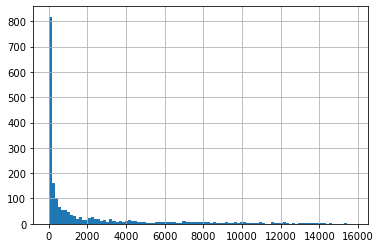

In [113]:
df['batter_id'].value_counts().hist(bins=100);

In [13]:
no_nulls.to_csv('data/baseball_no_nulls_after_dan3.csv', index=False)

In [126]:
no_nulls.head()

,Pitcher_name,batter_id,pitch_name,strike_attempt,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,inning,inning_topbot,effective_speed,release_spin_rate,pitch_number,bat_score,fld_score,vx0,vy0,vz0,ax,ay,az,outs_when_up,2s_usage,4s_usage,changeup_usage,curveball_usage,cutter_usage,eephus_usage,fastball_usage,forkball_usage,ball_usage,knucklecurve_usage,knuckleball_usage,pitchout_usage,screwball_usage,sinker_usage,slider_usage,split_usage,unknown_usage
0,Wade Davis,527038,4-Seam Fastball,strike,96.1,-1.92,5.95,1,1,1,2,-0.27,1.70,-0.93,1.62,12,0,95.4,2463.0,6,2,7,3.075,-139.609,-9.724,-2.028,34.780,-11.706,2,0.018929,0.47782,0.005354,0.000191,0.293881,0.0,0.0,0.0,0.000765,0.19847,0.0,0.000191,0.0,0.0,0.000382,0.0,0.004015
1,Wade Davis,527038,Cutter,strike,93.1,-1.50,6.02,1,1,1,2,0.24,0.72,0.78,1.55,12,0,92.2,2705.0,5,2,7,5.156,-135.442,-7.227,5.004,28.835,-25.323,2,0.018929,0.47782,0.005354,0.000191,0.293881,0.0,0.0,0.0,0.000765,0.19847,0.0,0.000191,0.0,0.0,0.000382,0.0,0.004015
2,Wade Davis,527038,4-Seam Fastball,strike,97.0,-1.37,6.08,1,1,1,2,-0.50,1.41,1.32,2.47,12,0,96.4,2362.0,4,2,7,8.459,-140.843,-7.313,-5.412,31.551,-15.189,2,0.018929,0.47782,0.005354,0.000191,0.293881,0.0,0.0,0.0,0.000765,0.19847,0.0,0.000191,0.0,0.0,0.000382,0.0,0.004015
3,Wade Davis,527038,Cutter,ball,93.6,-1.25,6.06,1,1,0,2,0.32,0.80,2.92,2.23,12,0,92.8,2724.0,3,2,7,10.094,-135.734,-5.821,6.079,26.355,-24.250,2,0.018929,0.47782,0.005354,0.000191,0.293881,0.0,0.0,0.0,0.000765,0.19847,0.0,0.000191,0.0,0.0,0.000382,0.0,0.004015
4,Wade Davis,527038,4-Seam Fastball,strike,97.1,-1.49,6.08,1,1,0,1,-0.76,1.63,0.26,2.74,12,0,96.0,2401.0,2,2,7,6.519,-140.993,-7.138,-9.148,32.251,-11.956,2,0.018929,0.47782,0.005354,0.000191,0.293881,0.0,0.0,0.0,0.000765,0.19847,0.0,0.000191,0.0,0.0,0.000382,0.0,0.004015


In [106]:
dummy = pd.get_dummies(no_nulls, columns=['pitch_name','batter_id'])

In [117]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3765727 entries, 0 to 3925777
Columns: 2625 entries, Pitcher_name to batter_name_pitcher Manny
dtypes: float64(32), int64(10), object(1), uint8(2582)
memory usage: 10.3+ GB


In [133]:
no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3765727 entries, 0 to 3925777
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Pitcher_name        object 
 1   batter_id           int64  
 2   pitch_name          object 
 3   strike_attempt      object 
 4   release_speed       float32
 5   release_pos_x       float32
 6   release_pos_z       float32
 7   stand               float32
 8   p_throws            float32
 9   balls               float32
 10  strikes             float32
 11  pfx_x               float32
 12  pfx_z               float32
 13  plate_x             float32
 14  plate_z             float32
 15  inning              float32
 16  inning_topbot       float32
 17  effective_speed     float32
 18  release_spin_rate   float32
 19  pitch_number        float32
 20  bat_score           float32
 21  fld_score           float32
 22  vx0                 float32
 23  vy0                 float32
 24  vz0                 floa

In [131]:
no_nulls.iloc[:,1:2] = no_nulls.iloc[:,1:2].astype(np.float32)

In [100]:
df['pitch_name'].unique()

array(['4-Seam Fastball', 'Cutter', 'Knuckle Curve', '2-Seam Fastball',
       'Intentional Ball', 'Slider', 'Curveball', 'Sinker',
       'Split-Finger', 'Changeup', 'Knuckleball', 'Unknown', 'Pitch Out',
       'Eephus', 'Forkball', 'Screwball', 'Fastball'], dtype=object)

In [87]:
'Changeup' in df[df['Pitcher_name']=='Wade Davis']['pitch_name'].unique()

True

In [114]:
practice['Pitcher_name'].unique()

array(['Wade Davis', 'Bartolo Colon', 'Addison Reed', 'Luke Hochevar',
       'Jonathon Niese', 'Jeurys Familia', 'Kelvin Herrera',
       'Matt Harvey', 'Edinson Volquez'], dtype=object)

In [ ]:
for pitcher in df['Pitcher_name'].unique():
    
    for pitch in df['pitch_name'].unique():
        
        if pitch in df[df['Pitcher_name']==pitcher]['pitch_name'].unique():
            
#             print(f'This {pitcher} throws the {pitch} this percentage of the time.')
#             print(pitcher_att_df.loc[pitcher].loc[pitch][0])
            
            
            df[f'{pitch}_usage'] = pitcher_att_df.loc[pitcher].loc[pitch][0]
        
        else:
            
#             print(f'{pitcher} can\'t throw a {pitch}')
            df[f'{pitch}_usage'] = 0

In [144]:
practice.iloc[295]

game_date              2015-11-01
pitch_type                     SL
Pitcher_name          Matt Harvey
pitcher_id                 518774
batter_name           Ben Zobrist
                         ...     
Slider_usage             0.203365
Curveball_usage         0.0967139
Sinker_usage                    0
Split-Finger_usage              0
Changeup_usage           0.116194
Name: 295, Length: 65, dtype: object

In [135]:
pitcher_att_df.loc['Zack Wheeler'].loc['Slider']

0.19200645012669892

In [136]:
def usage(pitcher_name):
    if pitcher_name == practice['Pitcher_name']:
        return pitcher_att_df.loc[pitcher_name].loc['Slider'][0]
    else:
        return 0

In [145]:
practice['Pitcher_name'].map(usage('Matt Harvey'))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [121]:
practice.sample(5)

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up,4-Seam Fastball_usage,Cutter_usage,Knuckle Curve_usage,2-Seam Fastball_usage,Intentional Ball_usage,Slider_usage,Curveball_usage,Sinker_usage,Split-Finger_usage,Changeup_usage
66,2015-11-01,KC,Luke Hochevar,460024,David Wright,431151,80.6,-0.72,6.29,1,1,1,1,0.67,-1.50,1.81,0.15,0,0,0,11,0,78.6,2352.0,5.9,521692,543333,450314,519058,444876,460086,456715,449181,79,3,Knuckle Curve,2,2,2,2,Standard,Strategic,1-1,ball,NaN,ball,B,NaN,4.075,-117.230,-3.494,7.744,29.011,-48.051,1,0.375049,0,0,0.197068,0,0.203365,0.096714,0,0,0.116194
252,2015-11-01,FF,Matt Harvey,518774,Alex Gordon,460086,95.5,-0.83,6.07,0,1,1,0,-0.91,1.66,0.00,2.54,0,0,0,5,1,93.5,2427.0,5.7,518595,446263,502517,431151,527038,624424,493316,434158,29,2,4-Seam Fastball,0,1,0,1,Standard,Standard,1-0,strike,NaN,swinging_strike,S,NaN,4.241,-138.837,-7.299,-10.819,35.804,-12.565,1,0.375049,0,0,0.197068,0,0.203365,0.096714,0,0,0.116194
188,2015-11-01,KC,Edinson Volquez,450172,Yoenis Cespedes,493316,82.7,-1.24,5.25,1,1,0,2,0.49,-0.87,1.45,2.93,434158,431151,502517,6,0,82.3,2770.0,6.4,521692,543333,450314,519058,444876,460086,456715,425567,44,3,Knuckle Curve,1,0,1,0,Standard,Standard,0-2,ball,NaN,ball,B,NaN,5.013,-120.273,3.556,6.530,23.422,-43.018,0,0.375049,0,0,0.197068,0,0.203365,0.096714,0,0,0.116194
264,2015-11-01,CH,Edinson Volquez,450172,Daniel Murphy,502517,85.3,-1.04,4.96,0,1,0,0,-1.17,0.07,0.61,1.17,0,0,0,4,0,85.4,1109.0,6.8,521692,543333,450314,519058,444876,460086,456715,425567,26,1,Changeup,1,0,1,0,Infield shift,Standard,0-0,ball,NaN,ball,B,NaN,6.393,-124.043,-2.411,-11.549,25.966,-33.507,1,0.375049,0,0,0.197068,0,0.203365,0.096714,0,0,0.116194
243,2015-11-01,FF,Matt Harvey,518774,Alex Rios,425567,98.3,-0.63,6.09,1,1,1,2,-0.76,1.40,0.73,1.78,0,0,460086,5,1,96.8,2251.0,5.9,518595,446263,502517,431151,527038,624424,493316,434158,30,5,4-Seam Fastball,0,1,0,1,Standard,Standard,1-2,strike,strikeout,called_strike,S,NaN,5.474,-142.672,-9.451,-9.349,34.680,-14.888,1,0.375049,0,0,0.197068,0,0.203365,0.096714,0,0,0.116194


In [132]:
df['Pitcher_name'][2]

'Wade Davis'

In [129]:
practice.tail(1)

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up,4-Seam Fastball_usage,Cutter_usage,Knuckle Curve_usage,2-Seam Fastball_usage,Intentional Ball_usage,Slider_usage,Curveball_usage,Sinker_usage,Split-Finger_usage,Changeup_usage
299,2015-11-01,FF,Matt Harvey,518774,Ben Zobrist,450314,93.2,-0.83,6.03,0,1,1,0,-1.01,1.48,-0.41,2.04,0,0,0,3,1,91.2,2265.0,5.8,518595,446263,502517,431151,527038,624424,493316,434158,18,2,4-Seam Fastball,0,1,0,1,Standard,Strategic,1-0,strike,NaN,called_strike,S,NaN,3.284,-135.514,-7.61,-11.545,34.758,-15.755,2,0.375049,0,0,0.197068,0,0.203365,0.096714,0,0,0.116194


In [109]:
practice.head()

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up,4-Seam Fastball_usage,Cutter_usage,Knuckle Curve_usage,2-Seam Fastball_usage,Intentional Ball_usage,Slider_usage,Curveball_usage,Sinker_usage,Split-Finger_usage,Changeup_usage
0,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,96.1,-1.92,5.95,1,1,1,2,-0.27,1.70,-0.93,1.62,0,624424,0,12,0,95.4,2463.0,6.4,460077,543333,450314,519058,444876,460086,456715,449181,94,6,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,strikeout,called_strike,S,NaN,3.075,-139.609,-9.724,-2.028,34.780,-11.706,2,0.123863,0,0.223245,0,0.000898,0,0,0.400112,0,0.243122
1,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.1,-1.50,6.02,1,1,1,2,0.24,0.72,0.78,1.55,0,624424,0,12,0,92.2,2705.0,5.9,460077,543333,450314,519058,444876,460086,456715,449181,94,5,Cutter,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,5.156,-135.442,-7.227,5.004,28.835,-25.323,2,0.123863,0,0.223245,0,0.000898,0,0,0.400112,0,0.243122
2,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,97.0,-1.37,6.08,1,1,1,2,-0.50,1.41,1.32,2.47,0,624424,0,12,0,96.4,2362.0,6.3,460077,543333,450314,519058,444876,460086,456715,449181,94,4,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,8.459,-140.843,-7.313,-5.412,31.551,-15.189,2,0.123863,0,0.223245,0,0.000898,0,0,0.400112,0,0.243122
3,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.6,-1.25,6.06,1,1,0,2,0.32,0.80,2.92,2.23,0,0,624424,12,0,92.8,2724.0,6.0,460077,543333,450314,519058,444876,460086,456715,449181,94,3,Cutter,2,7,2,7,Strategic,Strategic,0-2,ball,NaN,ball,B,NaN,10.094,-135.734,-5.821,6.079,26.355,-24.250,2,0.123863,0,0.223245,0,0.000898,0,0,0.400112,0,0.243122
4,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,97.1,-1.49,6.08,1,1,0,1,-0.76,1.63,0.26,2.74,0,0,624424,12,0,96.0,2401.0,6.1,460077,543333,450314,519058,444876,460086,456715,449181,94,2,4-Seam Fastball,2,7,2,7,Strategic,Standard,0-1,strike,NaN,foul,S,NaN,6.519,-140.993,-7.138,-9.148,32.251,-11.956,2,0.123863,0,0.223245,0,0.000898,0,0,0.400112,0,0.243122


In [96]:
pitcher_att_df.loc['Zack Wheeler'].loc['Unknown'][0]

0.000691085003455425

In [69]:
pitcher_att = df.groupby(['Pitcher_name','pitch_name']).size()/df.groupby(['Pitcher_name']).size()
pitcher_att_df = pd.DataFrame(pitcher_att)

In [53]:
pitcher_att_ser = pd.Series(pitcher_att)

In [70]:
pitcher_att_ser.index;

In [116]:
pitcher_att_df.loc['Edinson Volquez']

,pitch_usage
pitch_name,
2-Seam Fastball,0.005727
4-Seam Fastball,0.123863
Changeup,0.243122
Intentional Ball,0.000898
Knuckle Curve,0.223245
Sinker,0.400112
Unknown,0.003032


In [130]:
pitcher_att_df.loc['Matt Harvey']

,pitch_usage
pitch_name,
2-Seam Fastball,0.197068
4-Seam Fastball,0.375049
Changeup,0.116194
Curveball,0.096714
Intentional Ball,0.001181
Pitch Out,0.000295
Slider,0.203365
Unknown,0.010134


In [106]:
pitcher_att_df.loc['Clayton Kershaw']

,pitch_usage
pitch_name,
2-Seam Fastball,0.011581
4-Seam Fastball,0.459906
Changeup,0.004632
Curveball,0.166260
Intentional Ball,0.000313
Slider,0.345415
Unknown,0.011894


In [1]:
pitcher_att_df

NameError: name 'pitcher_att_df' is not defined

In [64]:
pitcher_att_df.reset_index(inplace=True)

In [ ]:
# try to get the create new 

In [74]:
pitcher_att_df.rename(columns={0:'pitch_usage'}, inplace=True)

In [32]:
df.groupby(['Pitcher_name']).size();

In [43]:
df.head()

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
0,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,96.1,-1.92,5.95,1,1,1,2,-0.27,1.70,-0.93,1.62,0,624424,0,12,0,95.4,2463.0,6.4,460077,543333,450314,519058,444876,460086,456715,449181,94,6,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,strikeout,called_strike,S,NaN,3.075,-139.609,-9.724,-2.028,34.780,-11.706,2
1,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.1,-1.50,6.02,1,1,1,2,0.24,0.72,0.78,1.55,0,624424,0,12,0,92.2,2705.0,5.9,460077,543333,450314,519058,444876,460086,456715,449181,94,5,Cutter,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,5.156,-135.442,-7.227,5.004,28.835,-25.323,2
2,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,97.0,-1.37,6.08,1,1,1,2,-0.50,1.41,1.32,2.47,0,624424,0,12,0,96.4,2362.0,6.3,460077,543333,450314,519058,444876,460086,456715,449181,94,4,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,8.459,-140.843,-7.313,-5.412,31.551,-15.189,2
3,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.6,-1.25,6.06,1,1,0,2,0.32,0.80,2.92,2.23,0,0,624424,12,0,92.8,2724.0,6.0,460077,543333,450314,519058,444876,460086,456715,449181,94,3,Cutter,2,7,2,7,Strategic,Strategic,0-2,ball,NaN,ball,B,NaN,10.094,-135.734,-5.821,6.079,26.355,-24.250,2
4,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,97.1,-1.49,6.08,1,1,0,1,-0.76,1.63,0.26,2.74,0,0,624424,12,0,96.0,2401.0,6.1,460077,543333,450314,519058,444876,460086,456715,449181,94,2,4-Seam Fastball,2,7,2,7,Strategic,Standard,0-1,strike,NaN,foul,S,NaN,6.519,-140.993,-7.138,-9.148,32.251,-11.956,2
